In [1]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
def plot_mfcc(mfcc, fs):
    plt.figure(figsize=(12,6))
    librosa.display.specshow(data=mfcc, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
    plt.title('MFCCs')
    plt.colorbar(format='%+02.0f dB')
    plt.tight_layout()


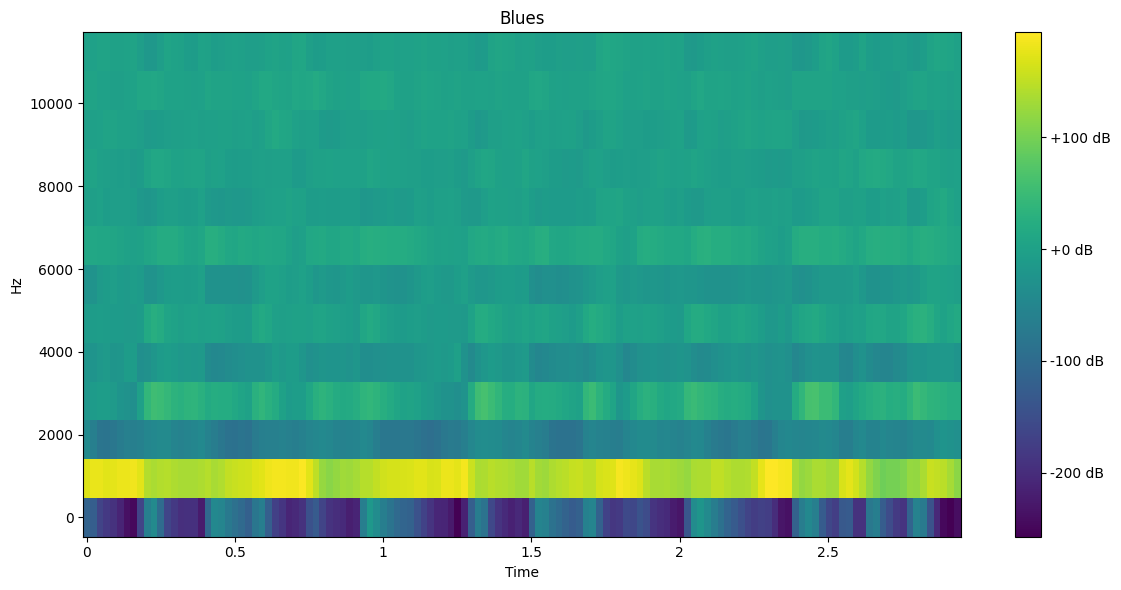

In [3]:
json_path = "C:/Users/ismai/OneDrive/Masaüstü/data/features_2.0_sec.json"

with open(json_path, "r") as fp:
    data = json.load(fp)

idx = 100
fs = 22500

mfcc_sample = np.array(data["mfcc"])[idx].T
plot_mfcc(mfcc_sample, fs)

if "genre_name" in data:
    plt.title(f"{np.array(data['genre_name'])[idx].title()}")
else:
    plt.title(f"Sample #{idx}")

In [4]:
X = np.array(data["mfcc"])
y = np.array(data["genre_num"])

print("MFCC şekli:", X.shape)
print("Etiket şekli:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

print("Eğitim verisi şekli:", X_train.shape)
print("Doğrulama verisi şekli:", X_val.shape)

MFCC şekli: (9986, 130, 13)
Etiket şekli: (9986,)
Eğitim verisi şekli: (5592, 130, 13)
Doğrulama verisi şekli: (1398, 130, 13)


In [5]:
model_lstm = Sequential()

model_lstm.add(LSTM(128, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(64))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(10, activation='softmax'))

model_lstm.compile(loss='sparse_categorical_crossentropy',
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                   metrics=['accuracy'])

model_lstm.summary()

C:\Users\ismai\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 130, 128)       │        72,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 130, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126,922 (495.79 KB)

 Trainable params: 126,922 (495.79 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model_lstm.fit(X_train, y_train,
                         validation_data=(X_val, y_val),
                         epochs=100,
                         batch_size=32,
                         verbose=1)

Epoch 1/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.1254 - loss: 2.2989 - val_accuracy: 0.3054 - val_loss: 2.1159
Epoch 2/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.2291 - loss: 2.1408 - val_accuracy: 0.3698 - val_loss: 1.9129
Epoch 3/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.3366 - loss: 1.9530 - val_accuracy: 0.4192 - val_loss: 1.7242
Epoch 4/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 13s 73ms/step - accuracy: 0.3482 - loss: 1.8346 - val_accuracy: 0.4492 - val_loss: 1.5933
Epoch 5/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.4122 - loss: 1.6919 - val_accuracy: 0.4557 - val_loss: 1.5414
Epoch 6/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 14s 79ms/step - accuracy: 0.4259 - loss: 1.6270 - val_accuracy: 0.4735 - val_loss: 1.4521
Epoch 7/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.4625 - loss: 1.5385 - val_accuracy: 0.5007 - val_loss: 1.3930
Epoch 8/100
175/175 ━━━━━━━━━━━━━━━━━━━━ 14s 82ms/step - accuracy: 0.4797 - loss: 1

KeyboardInterrupt: 

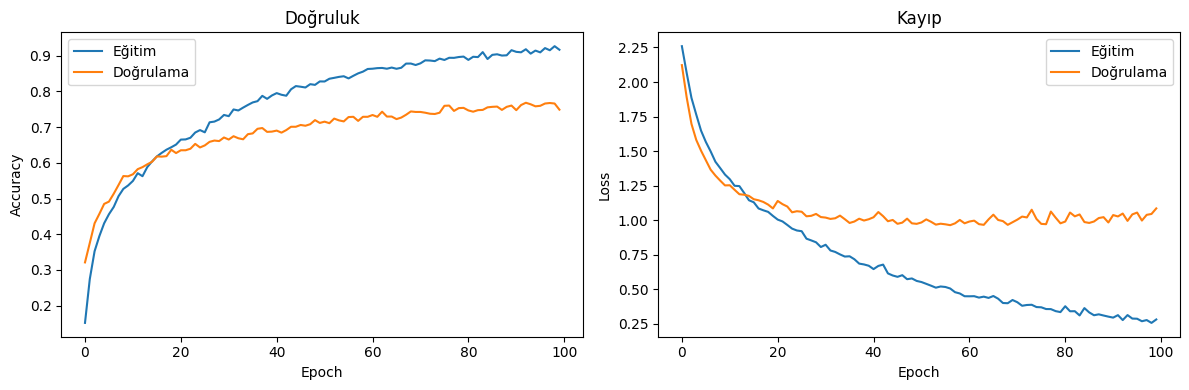

In [17]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Eğitim")
plt.plot(history.history["val_accuracy"], label="Doğrulama")
plt.title("Doğruluk")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Eğitim")
plt.plot(history.history["val_loss"], label="Doğrulama")
plt.title("Kayıp")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step


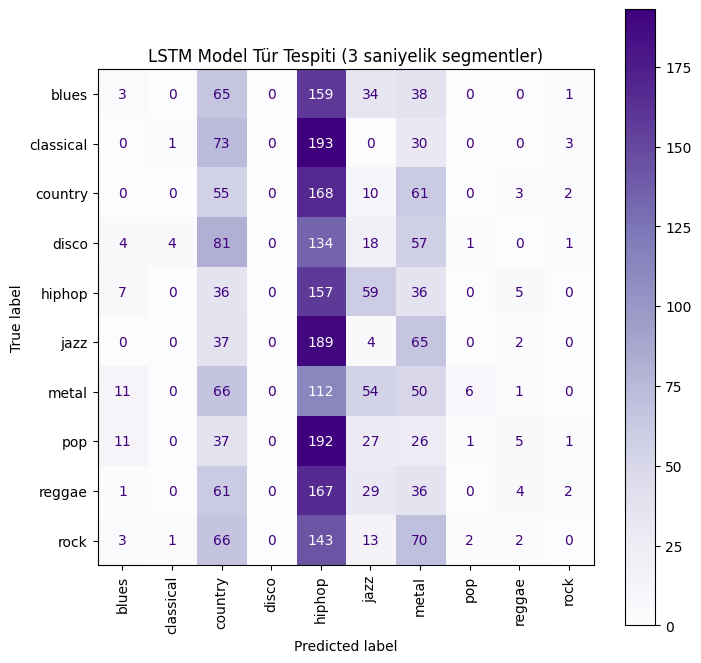

In [11]:
def make_prediction(model, X):
    global genres
    preds_num = []
    preds_name = []

    for X_current in X:
        X_current = X_current[np.newaxis, ...]
        pred = model.predict(X_current)
        pred = np.argmax(pred, axis=1)
        preds_num.append(pred[0])
        preds_name.append(genres[pred[0]])

    return preds_num, preds_name

genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

preds_num, preds_name = make_prediction(model_lstm, X_test)
cm = confusion_matrix(y_test, preds_num)

fig, ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(ax=ax, cmap='Purples', xticks_rotation='vertical')
plt.title('LSTM Model Tür Tespiti (3 saniyelik segmentler)')
plt.show()